In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

load data menggunakan link gdrive

ambil file ID:
https://drive.google.com/file/d/107RFNIXzmsqBfROYfKCnALkGK69ylOGB/

ubah ke URL download, dan nambahin: /uc?export=download&id

In [3]:
#with link
titanic_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1GR0-ymKvp4tu1DrJxeBTpASfzapE-21r')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data[9:12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
11,903,0,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S


In [6]:
titanic_data.tail(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
titanic_data.shape #menampilkan dimensi data

(418, 12)

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


# **HANDLING THE MISSING**

In [10]:
#menghapus kolom
titanic_data = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

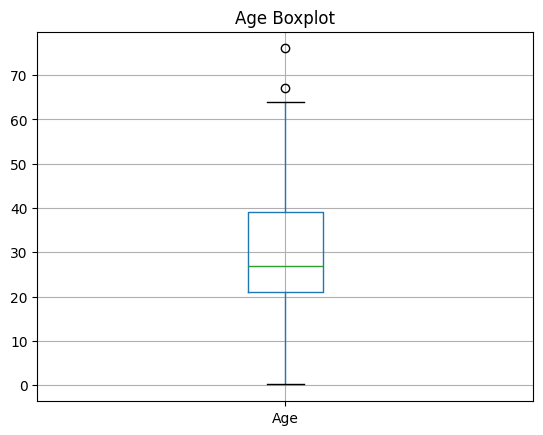

In [11]:
titanic_data.boxplot(column=['Age'])
plt.title('Age Boxplot')
plt.show()

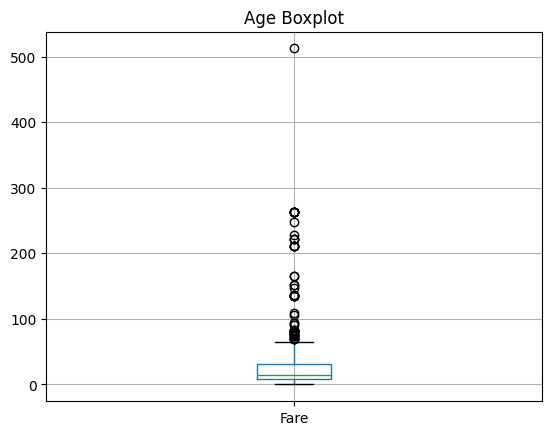

In [12]:
titanic_data.boxplot(column=['Fare'])
plt.title('Age Boxplot')
plt.show()

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

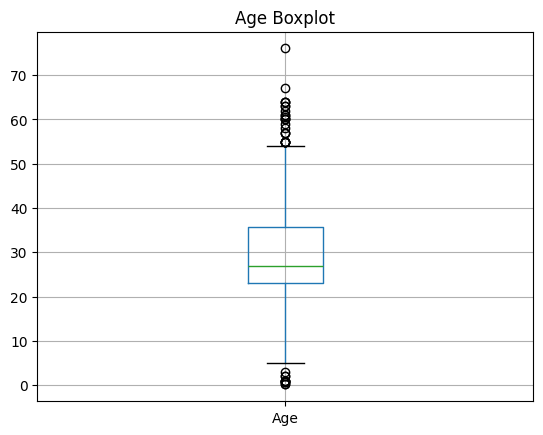

In [14]:
titanic_data.boxplot(column=['Age'])
plt.title('Age Boxplot')
plt.show()

In [15]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **DATA ANALYSC**

In [16]:
titanic_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418,418.000000,418.000000,418.000000,418.000000,418
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,266,NaN,NaN,NaN,NaN,270
mean,0.363636,2.265550,NaN,29.599282,0.447368,0.392344,35.576535,NaN
std,0.481622,0.841838,NaN,12.703770,0.896760,0.981429,55.850103,NaN
min,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,23.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.750000,1.000000,0.000000,31.471875,NaN


In [17]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [18]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [19]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


# **VISUALISASI DATA**

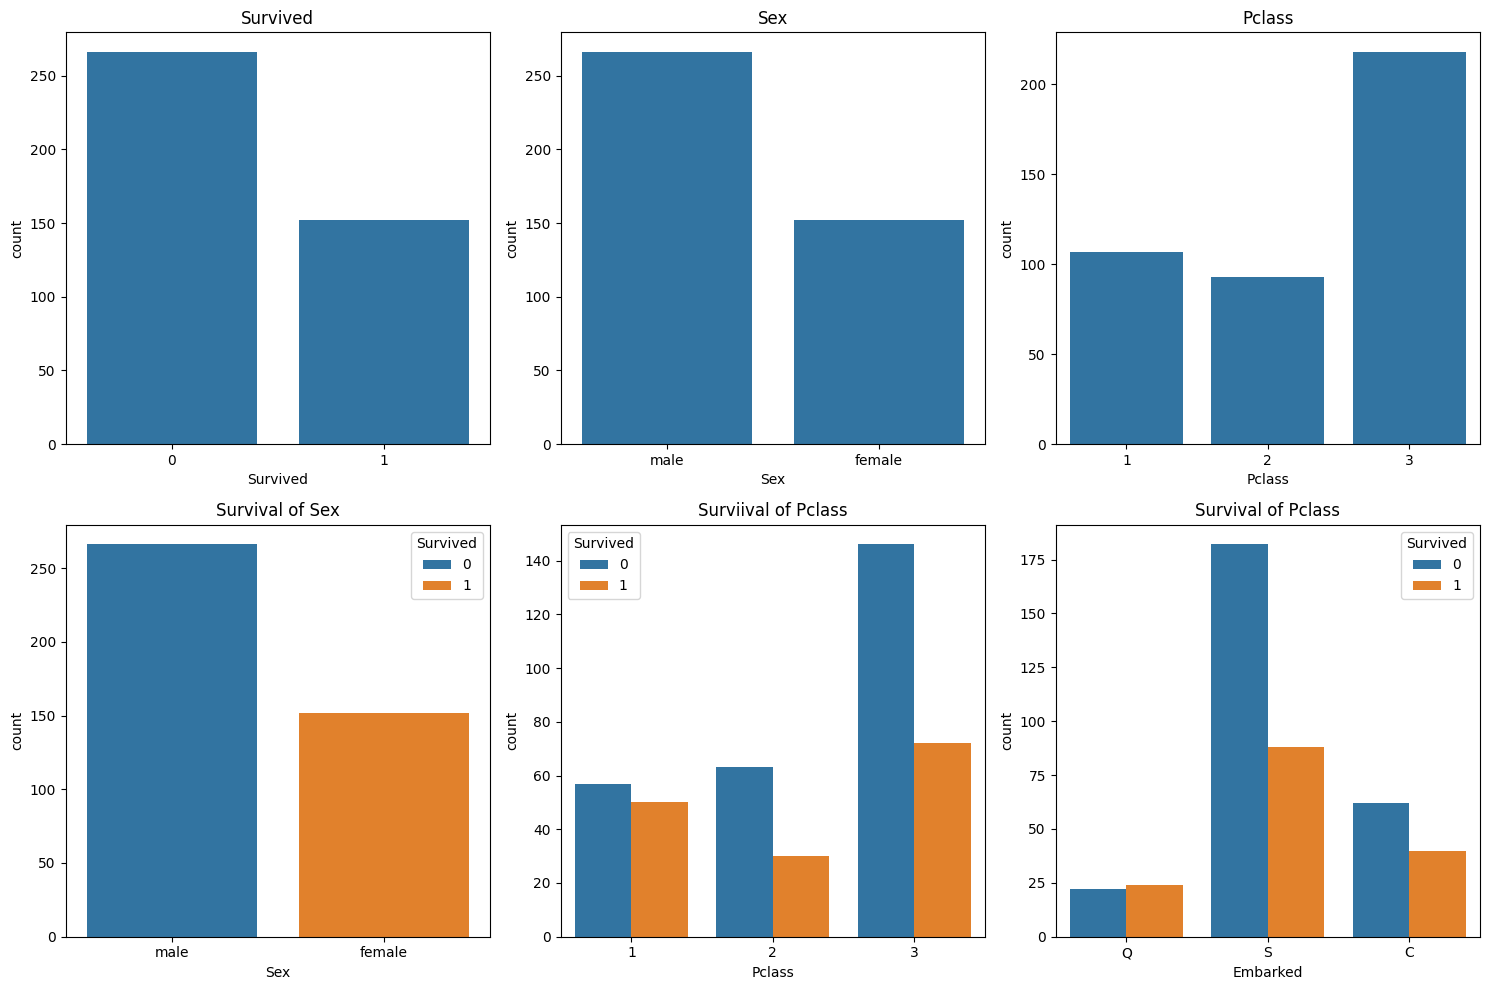

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flatten()

#plot 1
sns.countplot(x='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

#plot 2
sns.countplot(x='Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

#plot 3
sns.countplot(x='Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

#plot 4
sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

#plot 5
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Surviival of Pclass')

#plot 6
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Survival of Pclass')

plt.tight_layout()
plt.show()


In [21]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}

titanic_data.replace(replacements, inplace=True)

/tmp/ipython-input-3284127860.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements, inplace=True)


In [22]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


In [23]:
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [25]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [30]:
#acuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


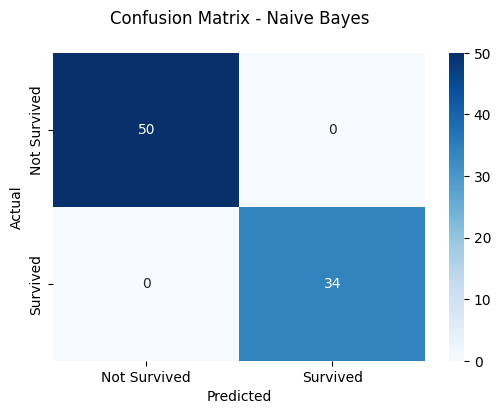

In [38]:
#visualisasi confusion matrix
plt.figure(figsize=(6, 4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix - Naive Bayes\n')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
#classification report
print("Classification Report (Naive Bayes):\n")
print(classification_report(Y_test, test_pred_nb))

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [37]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')
print("Naive Bayes Cross Validation Accuracy (5-fold): ")
print("Score: ", cv_nb)
print("Mean Accuracy: ", cv_nb.mean())
print("Std Deviation: ", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-fold): 
Score:  [1. 1. 1. 1. 1.]
Mean Accuracy:  1.0
Std Deviation:  0.0
